In [57]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

#Partners: Annie Yang and Jackson Lin

In [58]:
#Part 1

sqlite_file = r"C:\Users\lazya\Downloads\lahman2014.sqlite"

conn = sqlite3.connect(sqlite_file)
# connect salaries based on the salaries table from original
salary_query = "SELECT teamID, yearID, sum(salary) as total_payroll FROM Salaries WHERE yearID >= 1990 GROUP BY teamID, yearID ORDER BY teamID"
# connect winrate based on the winrate table from original
win_rate_query = "SELECT teamID, yearID, w as wins, g as games, \
CAST(w AS FLOAT)*100 / (g) as win_percentage, franchID FROM Teams \
WHERE yearID >= 1990 GROUP BY teamID, yearID ORDER BY teamID"

salaries = pd.read_sql(salary_query, conn)
win_rate = pd.read_sql(win_rate_query, conn)

#merge into one table
merge = salaries.merge(win_rate, how="inner", on=["teamID", "yearID"])

print(merge)

#To deal with the win rate query and to match it with the salary_query, I had to use the built in function merge. Essentially, once I figured out the statistics
# for both queries, I just simply merge them into one table. 

    teamID  yearID  total_payroll  wins  games  win_percentage franchID
0      ANA    1997     31135472.0    84    162       51.851852      ANA
1      ANA    1998     41281000.0    85    162       52.469136      ANA
2      ANA    1999     55388166.0    70    162       43.209877      ANA
3      ANA    2000     51464167.0    82    162       50.617284      ANA
4      ANA    2001     47535167.0    75    162       46.296296      ANA
..     ...     ...            ...   ...    ...             ...      ...
723    WAS    2010     61400000.0    69    162       42.592593      WSN
724    WAS    2011     63856928.0    80    161       49.689441      WSN
725    WAS    2012     80855143.0    98    162       60.493827      WSN
726    WAS    2013    113703270.0    86    162       53.086420      WSN
727    WAS    2014    131983680.0    96    162       59.259259      WSN

[728 rows x 7 columns]


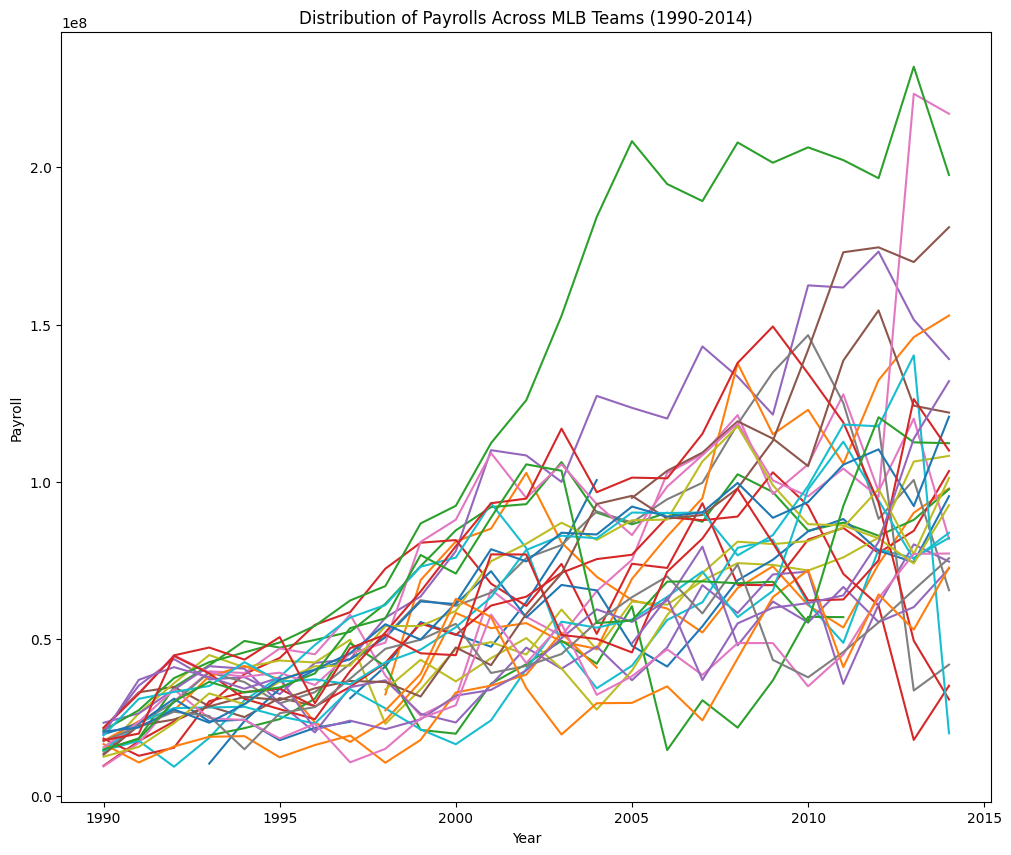

In [59]:
#Part 2
merge = salaries.merge(win_rate, how="inner", on=["teamID", "yearID"])


# Making Size Big
plt.figure(figsize=(12, 10))

# Finding each Team
for team, team_data in merge.groupby('teamID'):
    plt.plot(team_data['yearID'], team_data['total_payroll'])

# Add labels
plt.title('Distribution of Payrolls Across MLB Teams (1990-2014)')
plt.xlabel('Year')
plt.ylabel('Payroll')
plt.show()


# Question 1 : We can see a general pattern with all payroll between all the times. They seem to increase over time with a minimal number of some of the 
# MlB teams dropping. The Spread also seems to increase over time. 


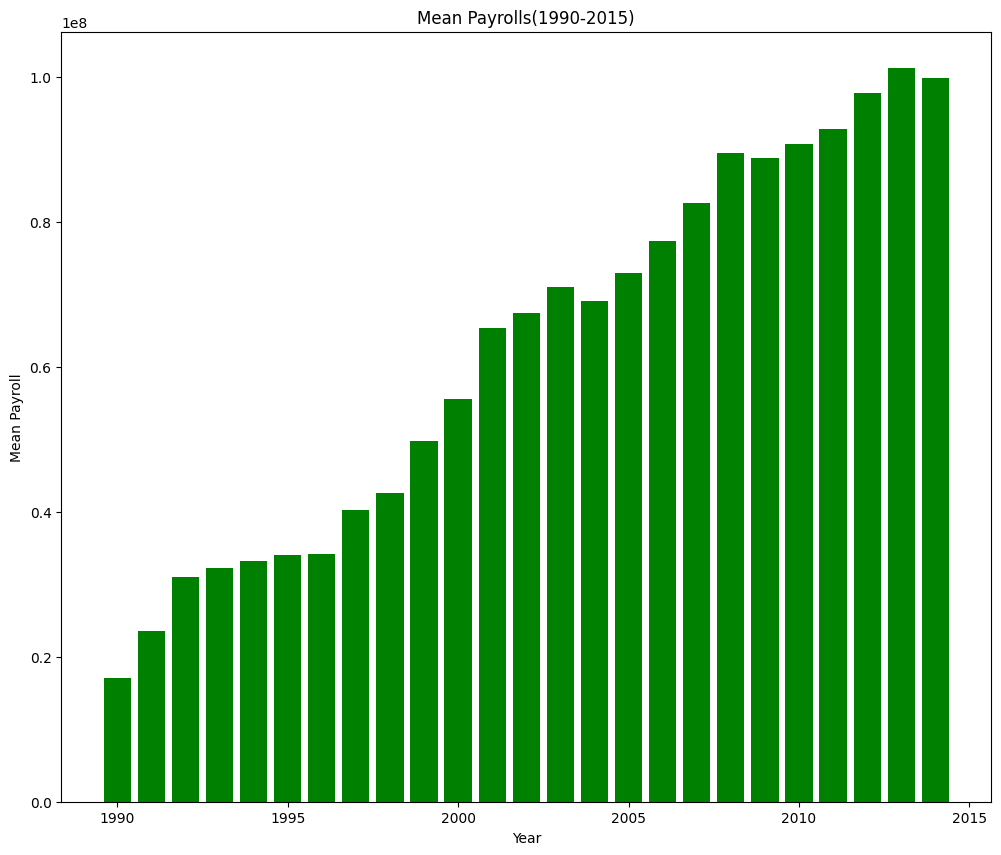

In [60]:
#Problem 3

# Calculate the mean payroll
mean_payroll = merge.groupby('yearID')['total_payroll'].mean()

# Make the plot
plt.figure(figsize=(12, 10))
plt.title("Mean Payrolls(1990-2015)")
plt.xlabel("Year")
plt.ylabel("Mean Payroll")
plt.bar(mean_payroll.index, mean_payroll, color = "green", width = .8)

plt.show()



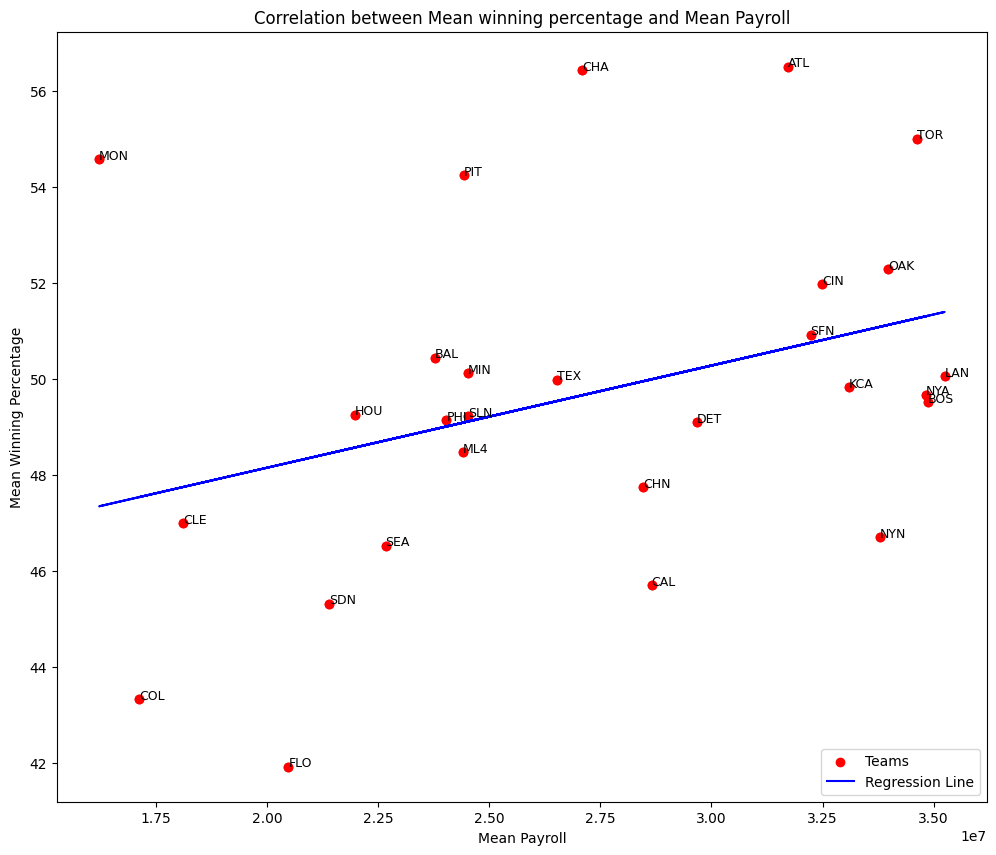

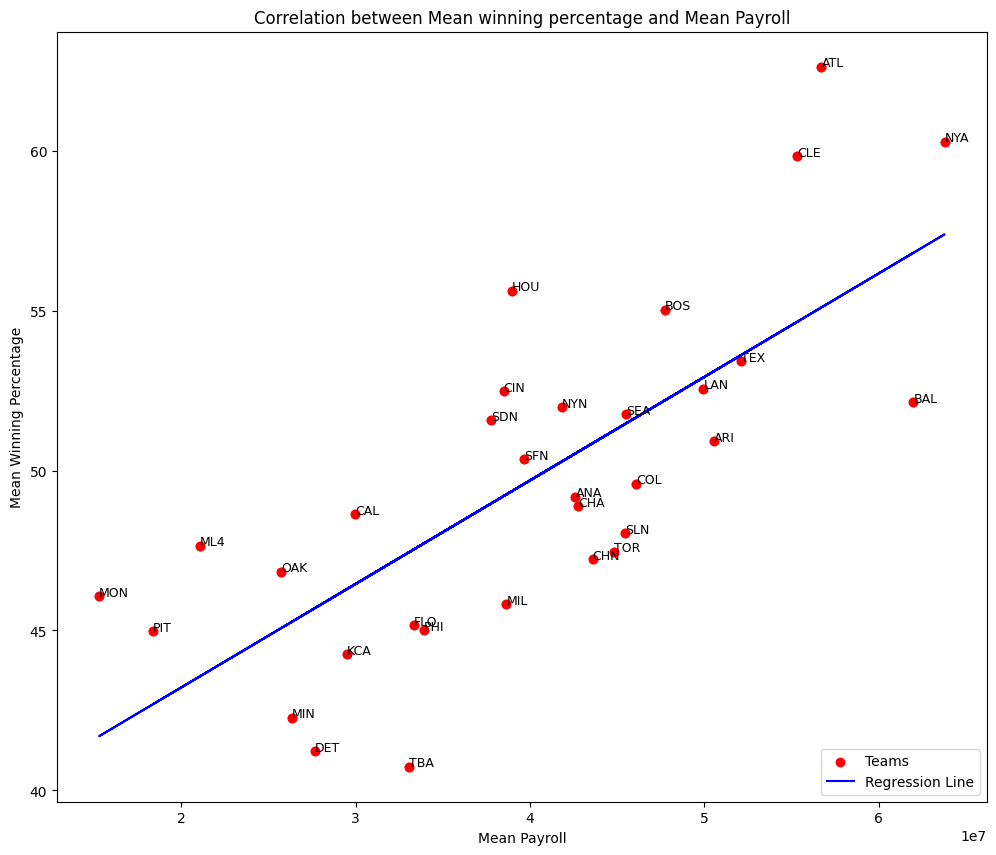

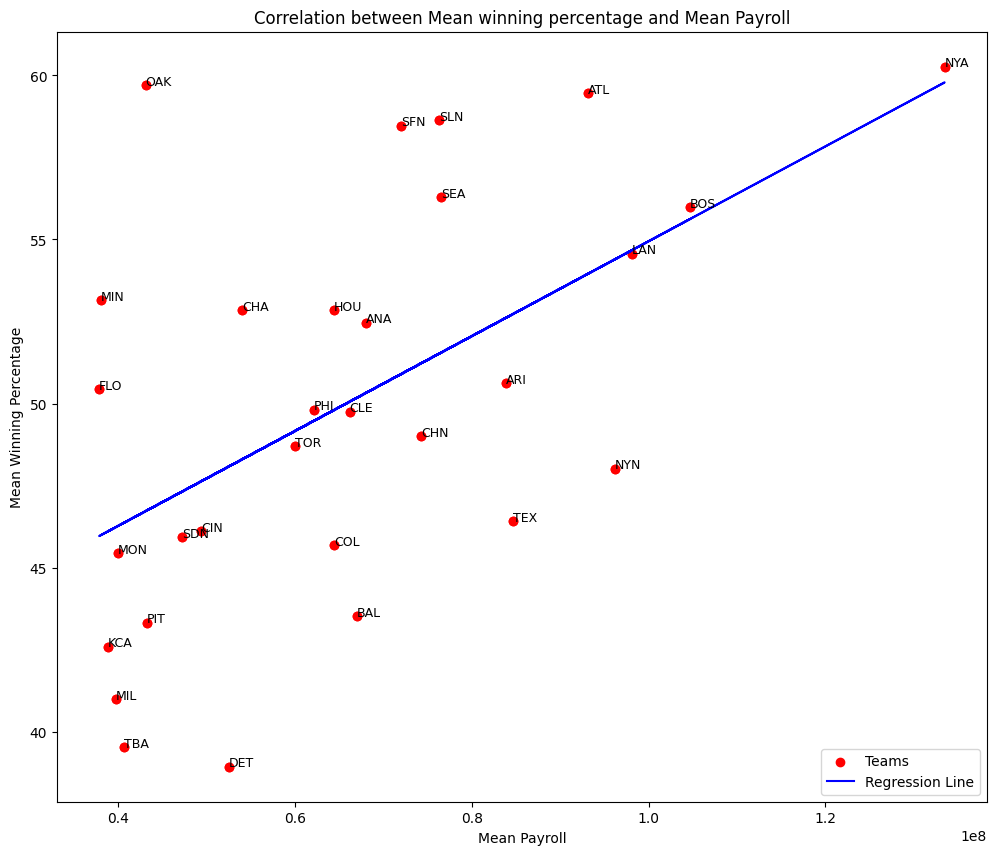

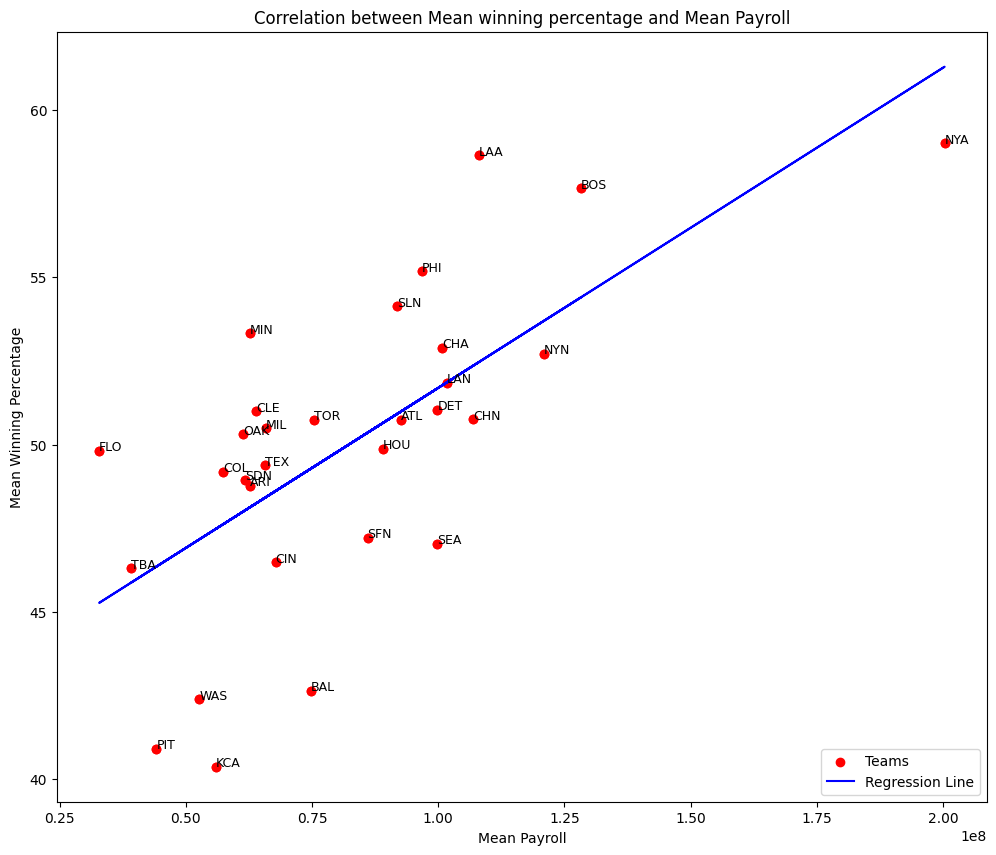

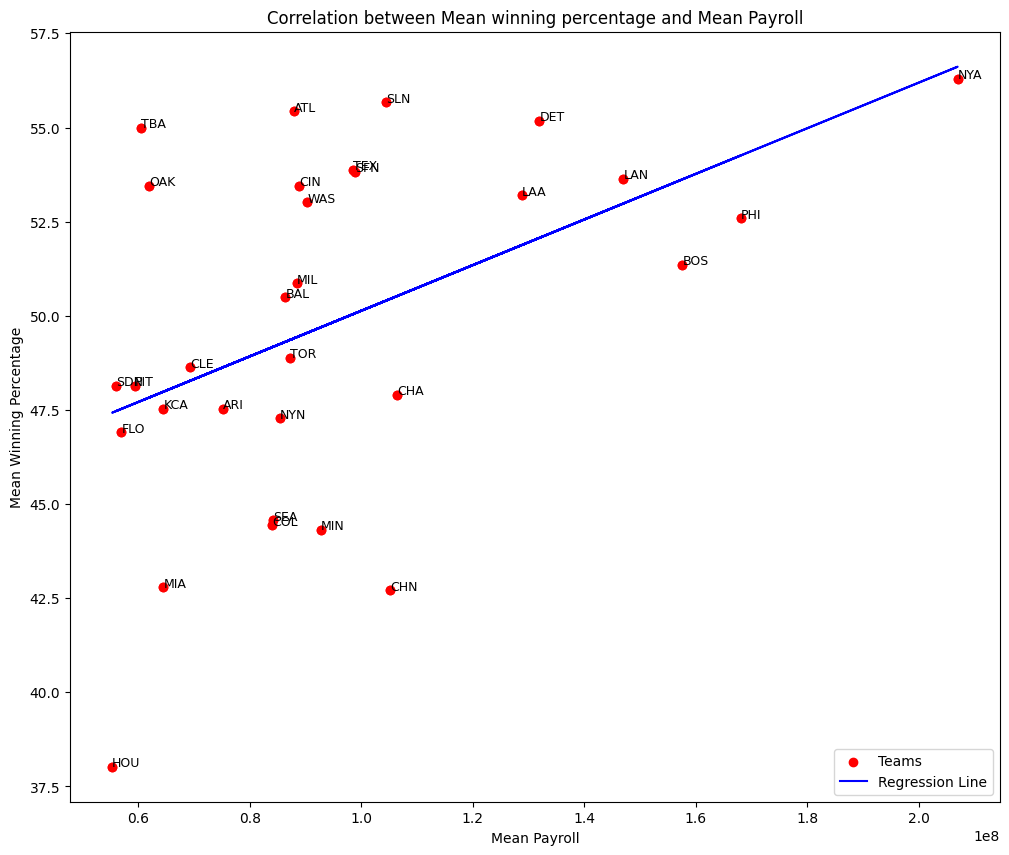

In [61]:
# Problem 4


time_periods = pd.cut(merge['yearID'], bins=[1989, 1994, 1999, 2004, 2009, 2014], labels=['1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014'])


merge['time_period'] = time_periods


for period in ['1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014']:
    period_data = merge[merge['time_period'] == period]
    
    mean_values = period_data.groupby('teamID').agg({'total_payroll':'mean', 'win_percentage':'mean'})
    
    # Making scatter plot
    plt.figure(figsize = (12,10))
    # x value is payroll and y value is win percentage
    plt.scatter(mean_values['total_payroll'], mean_values['win_percentage'], color = "red", label = "Teams",)

    for index, row in mean_values.iterrows():
        plt.scatter(row['total_payroll'], row['win_percentage'], color="red")
        plt.text(row['total_payroll'], row['win_percentage'], index, fontsize=9)
        
    
    # Making regression line
    x, y = np.polyfit(mean_values['total_payroll'], mean_values['win_percentage'], 1)
    plt.plot(mean_values['total_payroll'], x*mean_values['total_payroll'] + y, color='blue', label='Regression Line')
    
    # Plot settings
    plt.title("Correlation between Mean winning percentage and Mean Payroll")
    plt.xlabel('Mean Payroll')
    plt.ylabel('Mean Winning Percentage')
    plt.legend(loc = "lower right")
    plt.show()

In [62]:
# Problem 5
# Calculate the mean and standard deviation
merge['avg_payroll'] = merge.groupby('yearID')['total_payroll'].transform('mean')
merge['std_payroll'] = merge.groupby('yearID')['total_payroll'].transform('std')

# Calculate the standardized payroll
merge['standardized_payroll'] = (merge['total_payroll'] - merge['avg_payroll']) / merge['std_payroll']


payroll = merge[['yearID', 'teamID', 'total_payroll', 'standardized_payroll']].copy()


payroll.sort_values(by=['yearID', 'teamID'], inplace=True)
payroll.reset_index(drop=True, inplace=True)


print(payroll)

     yearID teamID  total_payroll  standardized_payroll
0      1990    ATL     14555501.0             -0.667275
1      1990    BAL      9680084.0             -1.959861
2      1990    BOS     20558333.0              0.924213
3      1990    CAL     21720000.0              1.232198
4      1990    CHA      9491500.0             -2.009859
..      ...    ...            ...                   ...
723    2014    SLN    120693000.0              0.457126
724    2014    TBA     72689100.0             -0.593171
725    2014    TEX    112255059.0              0.272509
726    2014    TOR    109920100.0              0.221422
727    2014    WAS    131983680.0              0.704160

[728 rows x 4 columns]


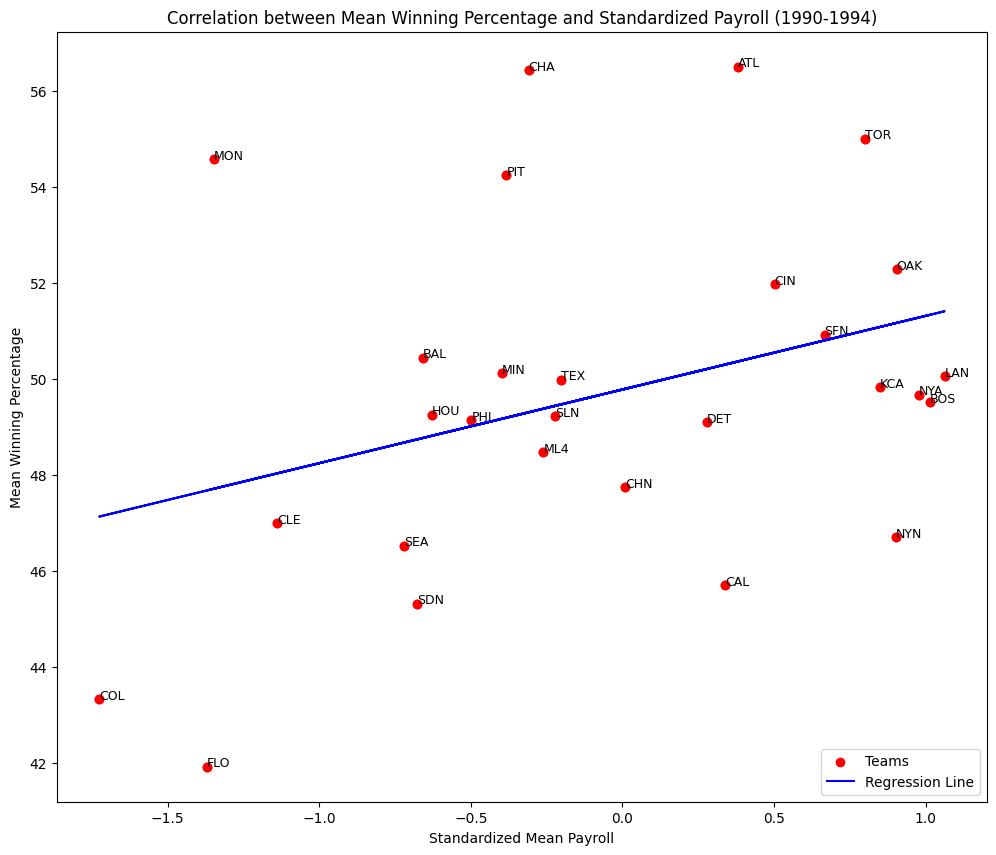

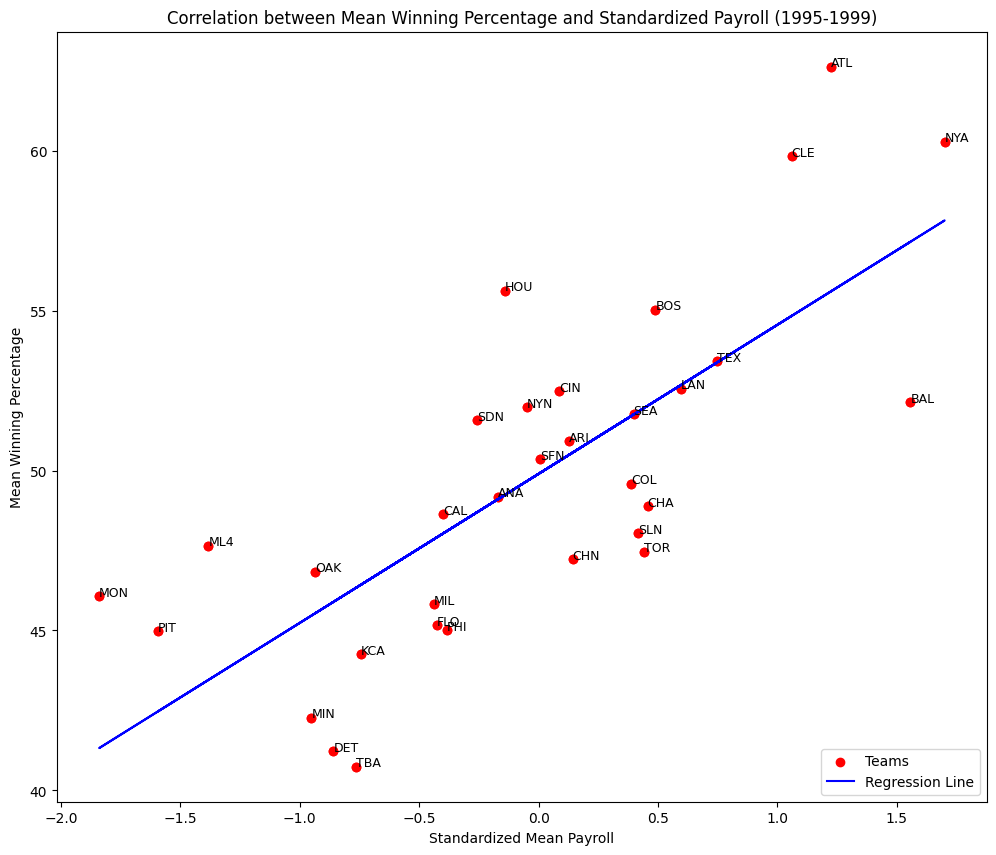

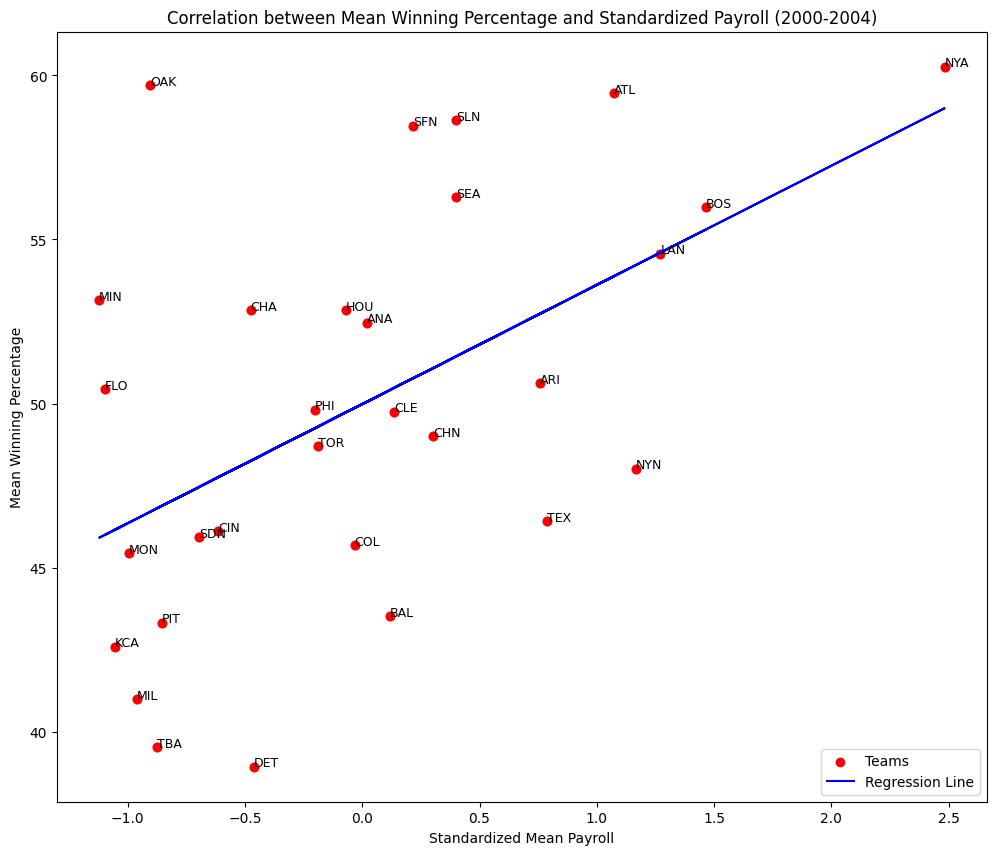

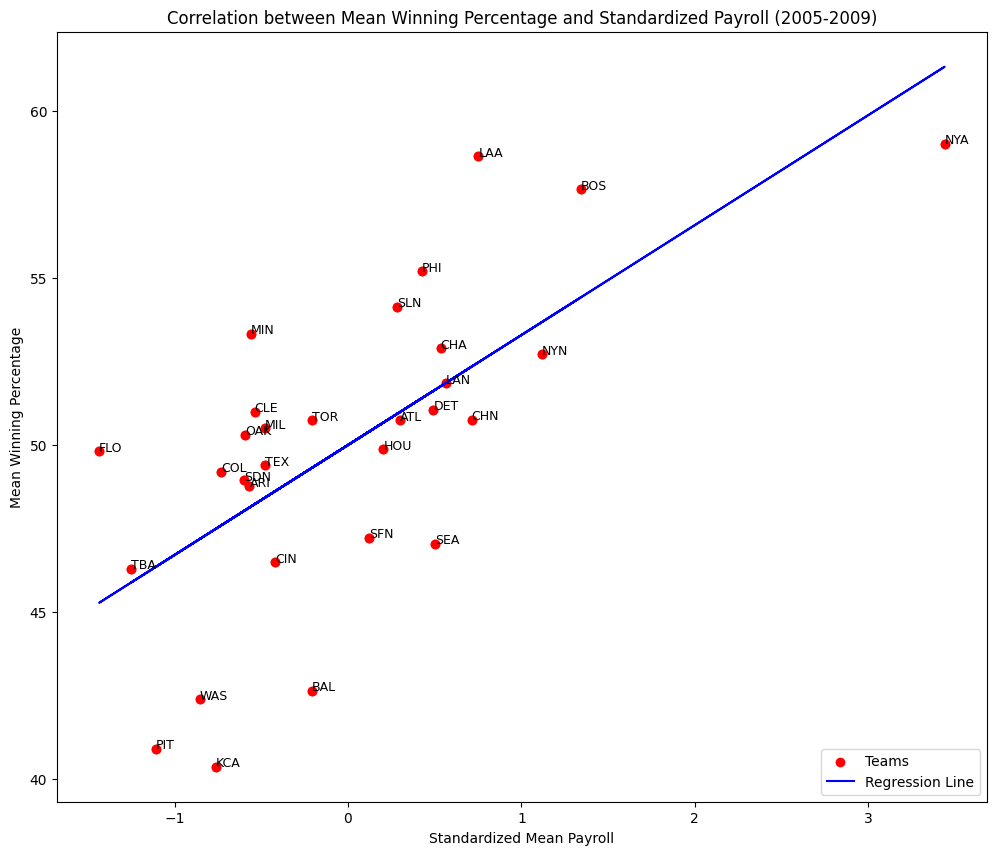

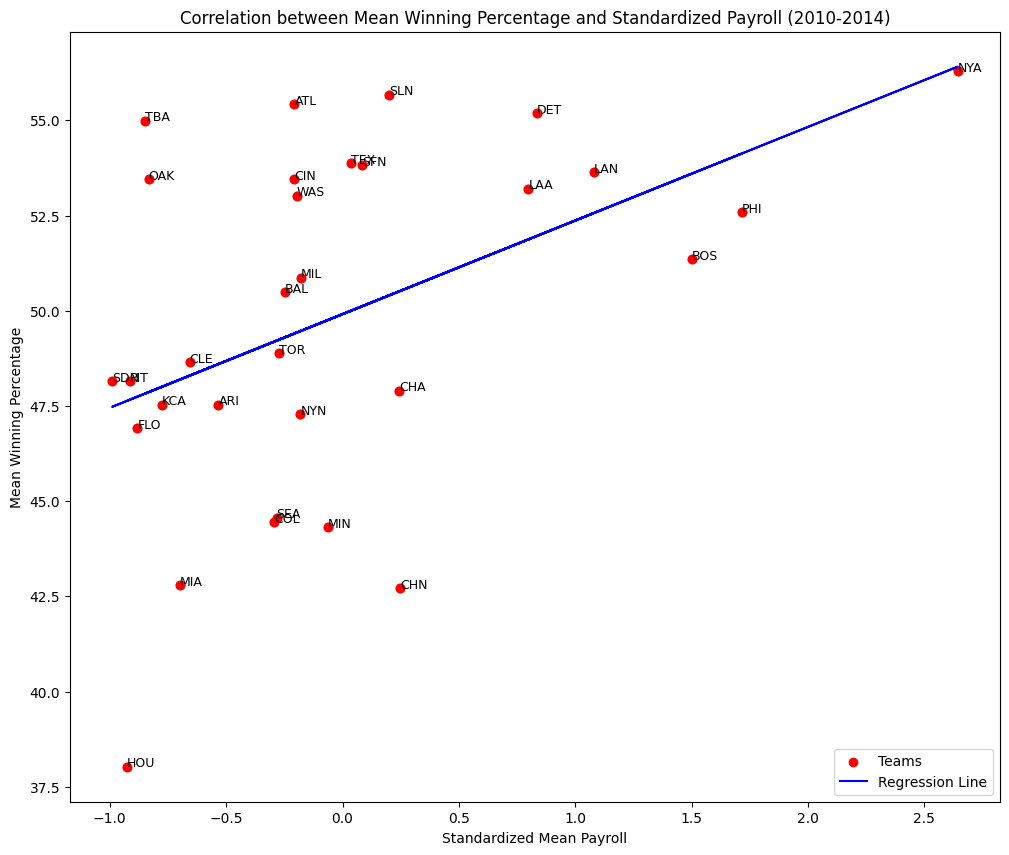

In [63]:
# Problem 6

# making a graph for every period
for period in ['1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014']:
    period_data = merge[merge['time_period'] == period]
    mean_values = period_data.groupby('teamID').agg({'standardized_payroll':'mean', 'win_percentage':'mean'})
    plt.figure(figsize=(12,10))
    plt.scatter(mean_values['standardized_payroll'], mean_values['win_percentage'], color="red", label="Teams")

    # plotting and naming each point
    for index, row in mean_values.iterrows():
        plt.scatter(row['standardized_payroll'], row['win_percentage'], color="red")
        plt.text(row['standardized_payroll'], row['win_percentage'], index, fontsize=9)
        
    # making regression line
    x, y = np.polyfit(mean_values['standardized_payroll'], mean_values['win_percentage'], 1)
    plt.plot(mean_values['standardized_payroll'], x*mean_values['standardized_payroll'] + y, color='blue', label='Regression Line')
    
    plt.title(f"Correlation between Mean Winning Percentage and Standardized Payroll ({period})")
    plt.xlabel('Standardized Mean Payroll')
    plt.ylabel('Mean Winning Percentage')
    plt.legend(loc="lower right")
    plt.show()


# Question 3
# Our plots from problem 4 and 6 are about the same. They both have an increasing slope and the scatter plots are in around the same area. 
# The difference in these two graphs are the x axis values. In problem 4, the x axis is only positive and showing the mean payroll while
# in problem 6, the x axis is both positive and negative, showing the standardized mean payroll. The graph in problem 4 shows a better
# representation of the mean payrolls but the graph in problem 6 shows a better representation of the comparison between the scatterplots
# from different time periods. 



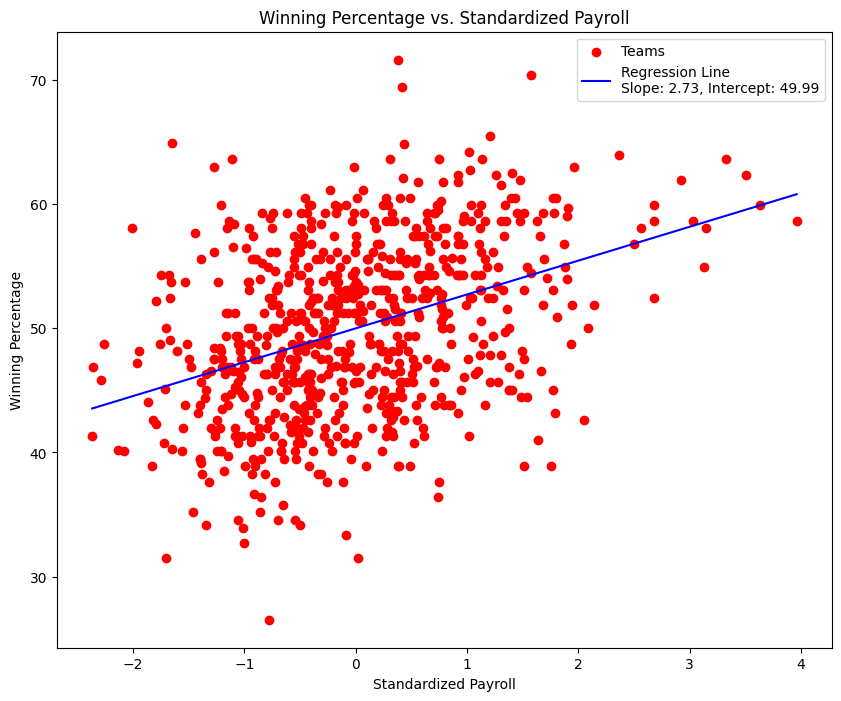

In [64]:
# Problem 7
# calculating the regression coefficients
x = merge['standardized_payroll']
y = merge['win_percentage']
slope, intercept = np.polyfit(x, y, 1)

# creating the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(x, y, color="red", label="Teams")

# adding the regression line
x_vals = np.array([min(x), max(x)])
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color='blue', label=f'Regression Line\nSlope: {slope:.2f}, Intercept: {intercept:.2f}')


plt.title("Winning Percentage vs. Standardized Payroll")
plt.xlabel('Standardized Payroll')
plt.ylabel('Winning Percentage')
plt.legend(loc="best")
plt.show()



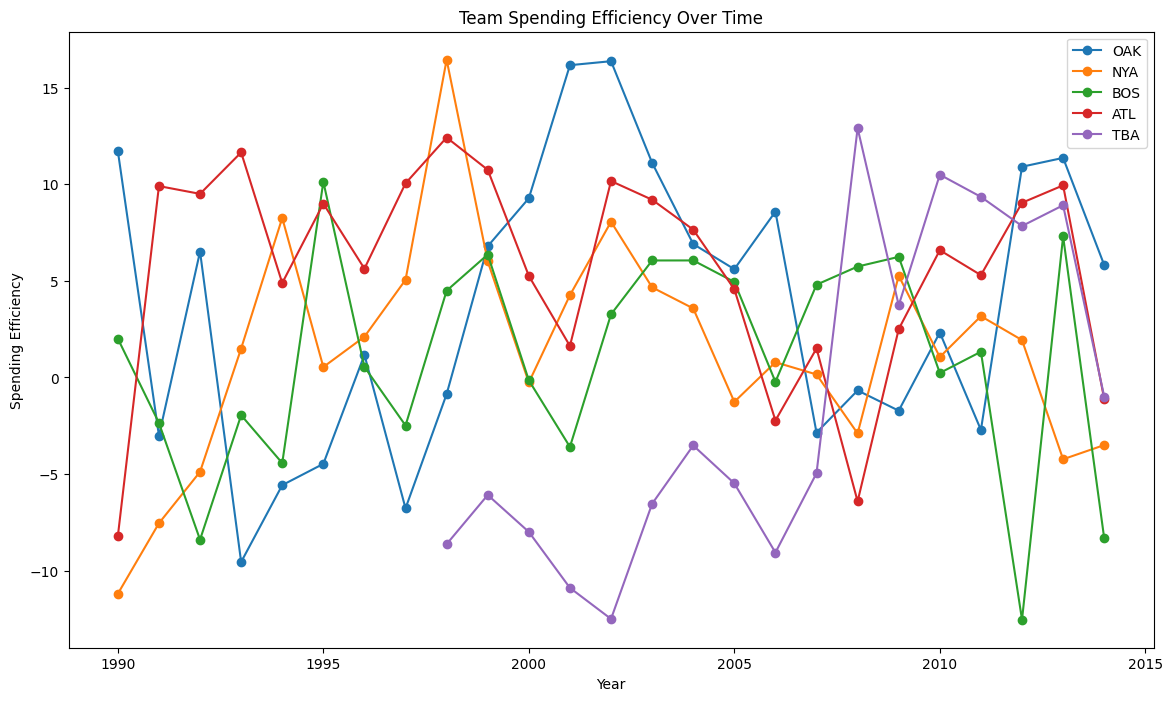

In [65]:
# Problem 8
# calculating the win percentage using win_pct = 50 + (standardized_payroll / 2) * 5
merge['expected_win_pct'] = 50 + (merge['standardized_payroll'] / 2) * 5

# getting the spending efficiency
merge['spending_efficiency'] = merge['win_percentage'] - merge['expected_win_pct']

# getting the selected teams
selected_teams = ['OAK', 'NYA', 'BOS', 'ATL', 'TBA']
filtered_data = merge[merge['teamID'].isin(selected_teams)]

# plot
plt.figure(figsize=(14, 8))

# going through the teams in selected teams
for team in selected_teams:
    team_data = filtered_data[filtered_data['teamID'] == team]
    plt.plot(team_data['yearID'], team_data['spending_efficiency'], label=team, marker='o')

plt.title('Team Spending Efficiency Over Time')
plt.xlabel('Year')
plt.ylabel('Spending Efficiency')
plt.legend()
plt.show()

# Question 4
# From this plot, I can tell the teams spending efficiency throughout the years while in the plot of question 2 and 3, I can only tell
# each team's spending efficiency in those certain years. This plot shows all the years for each of the teams and how their spending 
# efficiency changed over time. I learned that OKA's spending efficiency is actually not as good as how I described in questions 2 and 3.
# from this plot, I can see that OKA's spending efficiency was at its peak around the Moneyball period but it goes up and down a lot 
# throughout the years. This shows that their spending efficiency is very inconsistent. 

